# 0. Тема (Context)
Главная цель текущего анализа - оценить, от чего в основном зависит то, выжил человек или нет. Возможно, нам удастся посредством нахождения взаимосвязей выйти на какие-либо интересные факты.
Первым делом загрузим и рассмотрим данные о пассажирах Титаника

# 1. Оценка качества данных (Data quality assessment)
Для оценки качества данных подключим датасет и рассмотрим первые 10 строк:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_data = pd.read_csv('./train.csv', index_col='PassengerId')
titanic_data[0:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


можно заметить, что в колонке `Age` присутствуют значения `NaN`, от которых лучше избавиться (для примера посмотрите на возрасты первых двух пассажиров). Выберем один из способов с заменой недостающих данных на медиану. Для это вычислим медианный возраст:

In [2]:
median_age = titanic_data[:]['Age'].median()
median_age

39.0

Проведём замену и проверим, что всё прошло успешно:

In [3]:
titanic_data.loc[:]['Age'].fillna(median_age, inplace=True)

Далее стоит обратить внимание на признак `Sex` потому что формат данных в этой колонке можно улучшить: добавим колонку `SexCode`, которая будет похожа на `Sex`, но при этом заменим `male` на 0, а `female` на 1 так как с бинарными данными легче работать, чем со строками. Для начала проверим что в таблице присутствуют только два пола:

In [4]:
titanic_data.groupby('Sex').size()

Sex
female    43886
male      56114
dtype: int64

Создадим переменную `sex_code`, содержащую заменённые данные:

In [5]:
def string_to_code(sex):
    if sex == 'male':
        return 0
    return 1

sex_code = titanic_data[:]['Sex'].apply(string_to_code)

Добавим её в наш датасет перед колонкой `Sex` с последующим выводом для проверки:

In [6]:
titanic_data.insert(3, 'SexCode', sex_code)
titanic_data[:][:10]

,Survived,Pclass,Name,SexCode,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",0,male,39.00,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",0,male,39.00,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",0,male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",0,male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",0,male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",0,male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",0,male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",1,female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",0,male,27.00,2,1,474849,73.02,A7253,S


# 2. Анализ данных (Data exploration)
Построим диаграмму возрастов пассажиров (значения мы проверили ранее):

<AxesSubplot:ylabel='Frequency'>

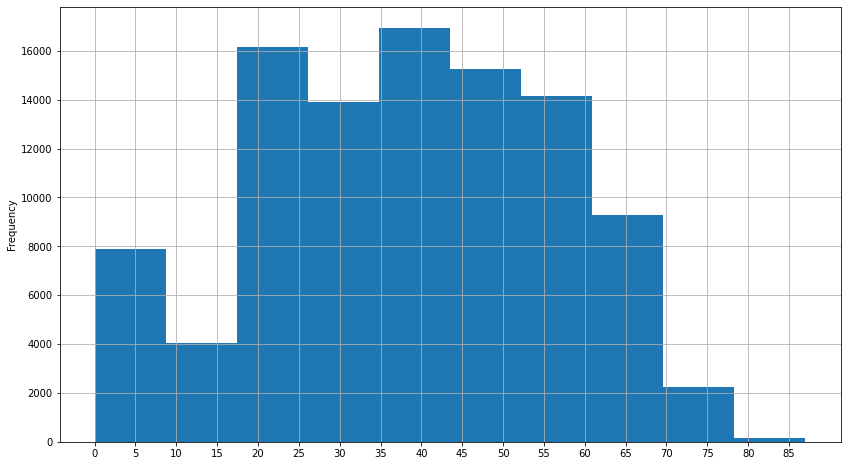

In [7]:
plt.figure(figsize=(14,8))
plt.xticks(range(0, 90, 5)) # на оси x будут значения от 0 до 90, с шагом 5
titanic_data['Age'].plot(kind='hist', grid=True)

Можем сделать вывод, что бОльшая часть пассажиров представлена возрастной группой от 17 до 60 лет

Далее обратим внимание на валидность признаков `Survived` и `Pclass` потому что с этими данными тоже будет интересно поработать:

In [8]:
print(titanic_data.groupby('Survived').size())
titanic_data.groupby('Pclass').size()

Survived
0    57226
1    42774
dtype: int64


Pclass
1    30315
2    28679
3    41006
dtype: int64

`Survived = 1` означает что пассажир выжил, `0` - нет. В данном случае поля валидны, и теперь посмотрим зависимость выживаемости от класса номера на борту:

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

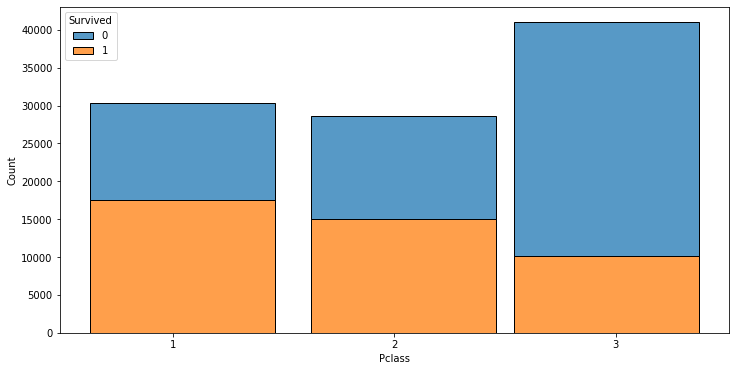

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(range(1,4))
sns.histplot(data=titanic_data, x="Pclass", hue="Survived", fill=True, legend=True, shrink=10, multiple="stack")

Больше всего пассажиров путешествовало в третьем классе, и, судя по гистограмме, в этом классе меньше всего выживших (в процентном соотношении). Лучше всего состоит обстановка в первом классе: в нём выживших больше половины, а во втором - примерно половина. Если обратиться к википедии, будет ясна взаимосвязь: каюты пассажиров третьего класса находились ниже остальных, и были затоплены в первую очередь.

Посмотрим на зависимость выживаемости от количества родственников. Сначала, как обычно, провалидируем данные:

In [10]:
titanic_data.groupby('SibSp').size()

SibSp
0    73308
1    19758
2     3703
3     1635
4     1168
5      132
8      296
dtype: int64

для удобства создадим одну колонку `Relatives`, в которой будут содержаться данные по братьям, мужьям, жёнам (`SibSp`) плюс по детям с родителями (`Parch`) и посмотри на результат:

<AxesSubplot:xlabel='Relatives', ylabel='Count'>

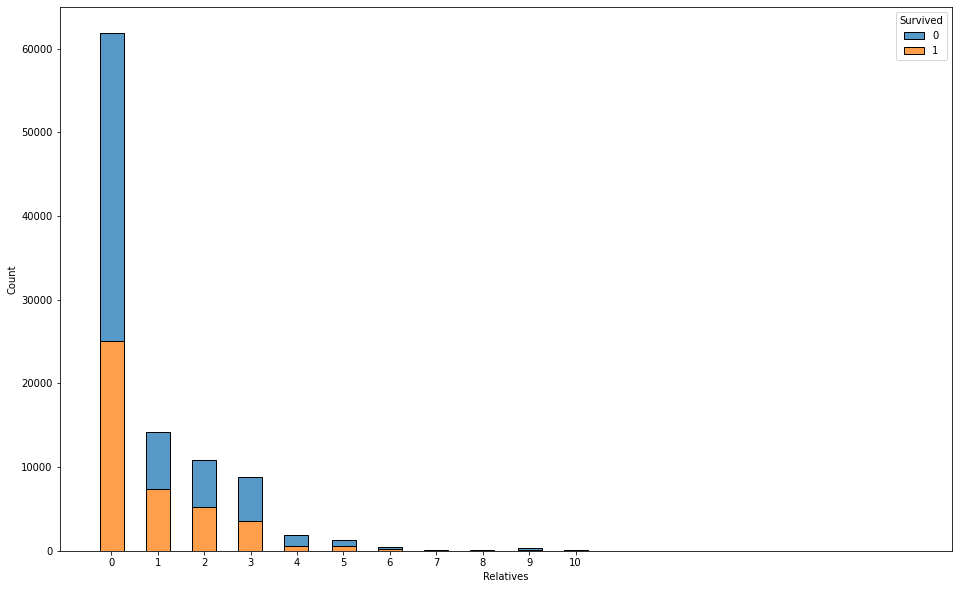

In [11]:
plt.figure(figsize=(16,10))
plt.xticks(range(0,11))
titanic_data['Relatives'] = titanic_data['SibSp'] + titanic_data['Parch']
sns.histplot(data=titanic_data, x="Relatives", hue="Survived", fill=True, legend=True, shrink=12, multiple="stack")

Из этой гистограммы видно, что если у пассажира не было родственников или их было более двух, то шанс выживания уменьшался

Посмотрим на зависимость выживаемости от того, в каком порту человек зашёл на корабль:

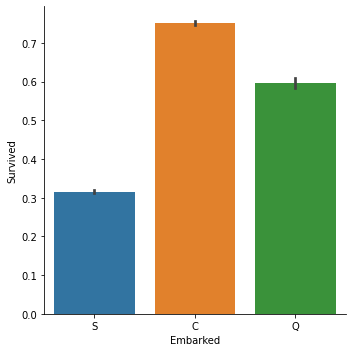

In [12]:
sns.catplot(data=titanic_data, x='Embarked', y='Survived', kind='bar')

Меньшую выживаемость показали пассажиры из города `S` (Southampton), далее `Q` (Queenstown) и лучший результат у `C` (Cherbourg). По этим данным у меня была гипотеза, что сначала купили билеты и зашли на Титаник люди из Cherbourg (приобрели билеты первого класса), затем Queenstown (взяли класс похуже), и, наконец, Southampton (приобрели оставшиеся билеты), но по факту судно следовало по маршруту Southampton-> Cherbourg -> Queenstown -> New-York, а это означает, что гипотеза даже не близка к истине

# 3. Итог (Summary)
Проанализировав датасет о пассажирах Титаника, можно сделать вывод, что, если бы вы захотели переплыть Атлантику в 1912 году на рассматриваемом судне и купили бы билет в первый класс, взяли бы с собой 1-2 родственника и являлись бы женщиной, ваш шанс выживания стремился бы к максимально возможному (в данной ситуации).
Что можно было сделать ещё:
1. Провести более глубокую чистку данных и решить, как заполнить `NaN`-значения в колонке `Age`
2. Проанализировать зависимость выживаемости от возраста пассажира (в процентах)

Спасибо! :)